In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("C:/Users/User/Desktop/S7/ML/diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.shape

(768, 9)

In [9]:
df["SkinThickness"]=df["SkinThickness"].replace(0, df["SkinThickness"].mean())

In [10]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,0,33.6,0.627,50,1
1,1,85,66,29.000000,0,26.6,0.351,31,0
2,8,183,64,20.536458,0,23.3,0.672,32,1
3,1,89,66,23.000000,94,28.1,0.167,21,0
4,0,137,40,35.000000,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180,32.9,0.171,63,0
764,2,122,70,27.000000,0,36.8,0.340,27,0
765,5,121,72,23.000000,112,26.2,0.245,30,0
766,1,126,60,20.536458,0,30.1,0.349,47,1


In [11]:
df["Insulin"]=df["Insulin"].replace(0, df["Insulin"].mean())

In [12]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


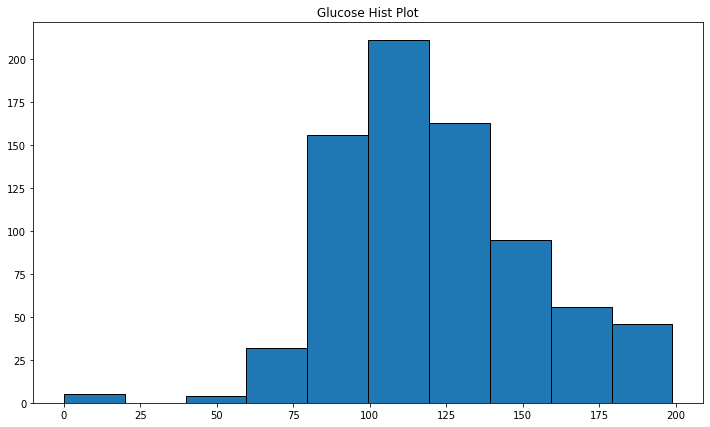

In [15]:
plt.figure(figsize=(12,7))
plt.hist("Glucose",data=df, edgecolor="k")
plt.title("Glucose Hist Plot")
plt.show()

In [19]:
def remove_outlier (dataFrame):
    for column_name in dataFrame.columns:
        Q1=df[column_name].quantile(0.25)
        Q3=df[column_name].quantile(0.75)
        IQR=Q3-Q1
        lower_limit = Q1-1.5*IQR
        upper_limit = Q3+1.5*IQR
        print(f"{column_name}>>Lowe limit: {lower_limit}\n upper limit: {upper_limit}")
        dataFrame = dataFrame[(dataFrame[column_name]>lower_limit)| (dataFrame[column_name]< upper_limit)]
    return dataFrame

In [20]:
df=remove_outlier(df)

Pregnancies>>Lowe limit: -6.5
 upper limit: 13.5
Glucose>>Lowe limit: 37.125
 upper limit: 202.125
BloodPressure>>Lowe limit: 35.0
 upper limit: 107.0
SkinThickness>>Lowe limit: 3.341145833333332
 upper limit: 49.1953125
Insulin>>Lowe limit: 8.623697916666671
 upper limit: 198.42578125
BMI>>Lowe limit: 13.35
 upper limit: 50.550000000000004
DiabetesPedigreeFunction>>Lowe limit: -0.32999999999999996
 upper limit: 1.2
Age>>Lowe limit: -1.5
 upper limit: 66.5
Outcome>>Lowe limit: -1.5
 upper limit: 2.5


In [21]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


In [22]:
df.shape

(768, 9)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [25]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [26]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,20.536458,79.799479,0.0,0.304,21
618,9,112,82,24.000000,79.799479,28.2,1.282,50
346,1,139,46,19.000000,83.000000,28.7,0.654,22
294,0,161,50,20.536458,79.799479,21.9,0.254,65
231,6,134,80,37.000000,370.000000,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35.000000,140.000000,28.6,0.411,26
106,1,96,122,20.536458,79.799479,22.4,0.207,27
270,10,101,86,37.000000,79.799479,45.6,1.136,38
435,0,141,0,20.536458,79.799479,42.4,0.205,29


In [27]:
y_train 

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

In [28]:
X_train.shape

(614, 8)

In [29]:
X_test.shape

(154, 8)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logReg=LogisticRegression()

In [32]:
logReg.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
logReg.score(X_test,y_test)

0.7532467532467533

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
prediction = logReg.predict(X_test)

In [39]:
cm = confusion_matrix(y_test, prediction)

In [40]:
cm

array([[79, 20],
       [18, 37]], dtype=int64)

<AxesSubplot:>

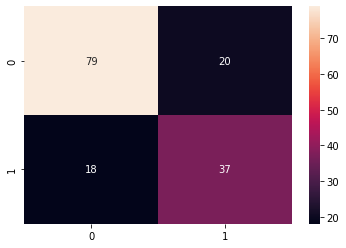

In [41]:
sns.heatmap(cm, annot=True)

In [45]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

